<a href="https://colab.research.google.com/github/brunompasini/Digit-Recognizer/blob/master/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Notebook by Bruno Pasini

github.com/brunompasini

In [ ]:
from google.colab import files
uploaded = files.upload()

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import pandas as pd
from keras.utils.np_utils import to_categorical
from keras.optimizers import RMSprop

## Reading Data

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()
x_train = train.drop(['label'], axis=1)
y_train = train['label']

## Normalizing and Reshaping

In [ ]:
x_train = x_train/255.0
test = test/255.0

In [ ]:
x_train.shape
# images are 28x28 but are 784 px in line
# and another dimension bc they are in grayscale

x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

x_train.shape

(42000, 28, 28, 1)

## Callbacks class



In [ ]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self,epock,logs={}):
    if (logs.get('accuracy')>=0.999):
      print("\nAccuracy is over 99.9%")
      self.model.stop_training = True

callbacks = myCallback()

## CNN Model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10, activation='softmax')
])
#dropout lacking
model.compile(optimizer=RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)             

## Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datag = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2
    )

datag.fit(x_train)

## Training

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size = 100, callbacks=[callbacks])

Epoch 1/10
420/420 [==============================] - 2s 4ms/step - loss: 0.2373 - accuracy: 0.9254
Epoch 2/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0697 - accuracy: 0.9786
Epoch 3/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0476 - accuracy: 0.9845
Epoch 4/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0392 - accuracy: 0.9880
Epoch 5/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0321 - accuracy: 0.9898
Epoch 6/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0286 - accuracy: 0.9912
Epoch 7/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0262 - accuracy: 0.9919
Epoch 8/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0220 - accuracy: 0.9928
Epoch 9/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0191 - accuracy: 0.9938
Epoch 10/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.9945

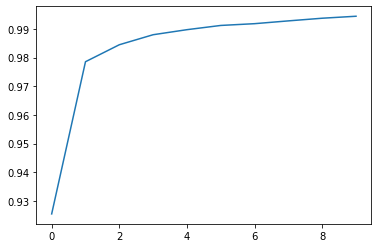

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
history = model.fit(datag.flow(x_train, y_train, batch_size=100), epochs=10, callbacks=[callbacks])

Epoch 1/10
420/420 [==============================] - 10s 23ms/step - loss: 0.1744 - accuracy: 0.9477
Epoch 2/10
420/420 [==============================] - 10s 23ms/step - loss: 0.1053 - accuracy: 0.9689
Epoch 3/10
420/420 [==============================] - 10s 23ms/step - loss: 0.0913 - accuracy: 0.9717
Epoch 4/10
420/420 [==============================] - 10s 23ms/step - loss: 0.0800 - accuracy: 0.9762
Epoch 5/10
420/420 [==============================] - 10s 23ms/step - loss: 0.0752 - accuracy: 0.9775
Epoch 6/10
420/420 [==============================] - 10s 23ms/step - loss: 0.0694 - accuracy: 0.9793
Epoch 7/10
420/420 [==============================] - 10s 23ms/step - loss: 0.0669 - accuracy: 0.9794
Epoch 8/10
420/420 [==============================] - 10s 23ms/step - loss: 0.0627 - accuracy: 0.9820
Epoch 9/10
420/420 [==============================] - 10s 23ms/step - loss: 0.0645 - accuracy: 0.9813
Epoch 10/10
420/420 [==============================] - 10s 24ms/step - loss: 0.059

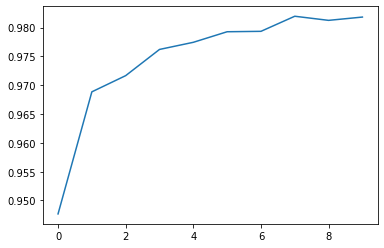

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("mnist_kaggle.csv",index=False)

In [ ]:
# got a 0.99353 score on kaggle

In [ ]:
files.download('mnist_kaggle.csv')